# **Predicción de Precios de Acciones de NVIDIA (NVDA) con Deep Learning**

### **Proyecto Final Samsung Innovation Campus – Módulo de Inteligencia Artificial (EC04)**

Integrantes:

- Ulices Chingo
- Sofia Feijóo
- Brayan Maisincho
- Esteban Quiña
- Alan Palma


In [57]:
# Librerías básicas para cómputo numérico y manejo de datos
import numpy as np
import pandas as pd
import warnings
import itertools

# Librerías para visualización
import matplotlib.pyplot as plt

# Librerías para análisis estadístico y series temporales
import statsmodels.api as sm

# Librerías de scikit-learn para preprocesamiento y evaluación
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Módulos propios del proyecto
from src.model_LSTM import model_LSTM

# LSTM

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [59]:
# ====== Configuration ======
ventana = 60
epocas = 20
batch_size = 32

# ====== upload ======
df = pd.read_csv("valid_csv_concatenado_invertido_con_60min.csv", parse_dates=['timestamp'])

# Date of our interest 
df = df[(df['timestamp'] >= '2023-01-01') & (df['timestamp'] <= '2023-06-30')]

# Using the "close" column
data = df[['close']].values
fechas = df['timestamp'].values

# Scaled
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# ====== Split ======
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - ventana:]

# ====== Make sequences ======
def crear_secuencias(data, ventana):
    X, y = [], []
    for i in range(ventana, len(data)):
        X.append(data[i - ventana:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = crear_secuencias(train_data, ventana)
X_test, y_test = crear_secuencias(test_data, ventana)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [60]:
# Usar model_LSTM
window = 60
batch_size = 32
epochs = 50

# Llamar a la función model_LSTM con los parámetros definidos
model = model_LSTM(window_size=window, batch_size=batch_size, epochs=epochs, X_train=X_train, y_train=y_train)

Epoch 1/50


c:\Users\user\anaconda3\envs\py312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0143
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.8698e-04
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.4726e-04
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.4197e-04
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3878e-04
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.4101e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3144e-04
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3018e-04
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.3184e-04
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2539e-04
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2302e-04
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.1842e-04
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.1978e-04
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1683e-04
Epoch 15/50
48/48 ━━━━━━━━━━━━

In [61]:
# Evaluar el modelo LSTM
predictions_LSTM = model.predict(X_test)
predictions_inverse_LSTM = scaler.inverse_transform(predictions_LSTM.reshape(-1, 1))
y_test_inverse_LSTM = scaler.inverse_transform(y_test.reshape(-1, 1))

# Metricas
mae = mean_absolute_error(y_test_inverse_LSTM, predictions_inverse_LSTM)
mse = mean_squared_error(y_test_inverse_LSTM, predictions_inverse_LSTM)
mape = np.mean(np.abs((y_test_inverse_LSTM - predictions_inverse_LSTM) / y_test_inverse_LSTM)) * 100

print(f"LSTM mean absolute error: {mae}")
print(f"LSTM mean squared error: {mse}")
print(f"LSTM mean absolute percentage error: {mape}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
LSTM mean absolute error: 0.4130976031695524
LSTM mean squared error: 0.577400084480849
LSTM mean absolute percentage error: 1.0378145653629882


# Gráficos

In [62]:

import matplotlib.pyplot as plt
import numpy as np

In [63]:
# Obtener las fechas correspondientes a los datos de prueba
fechas_pred = fechas[train_size:]


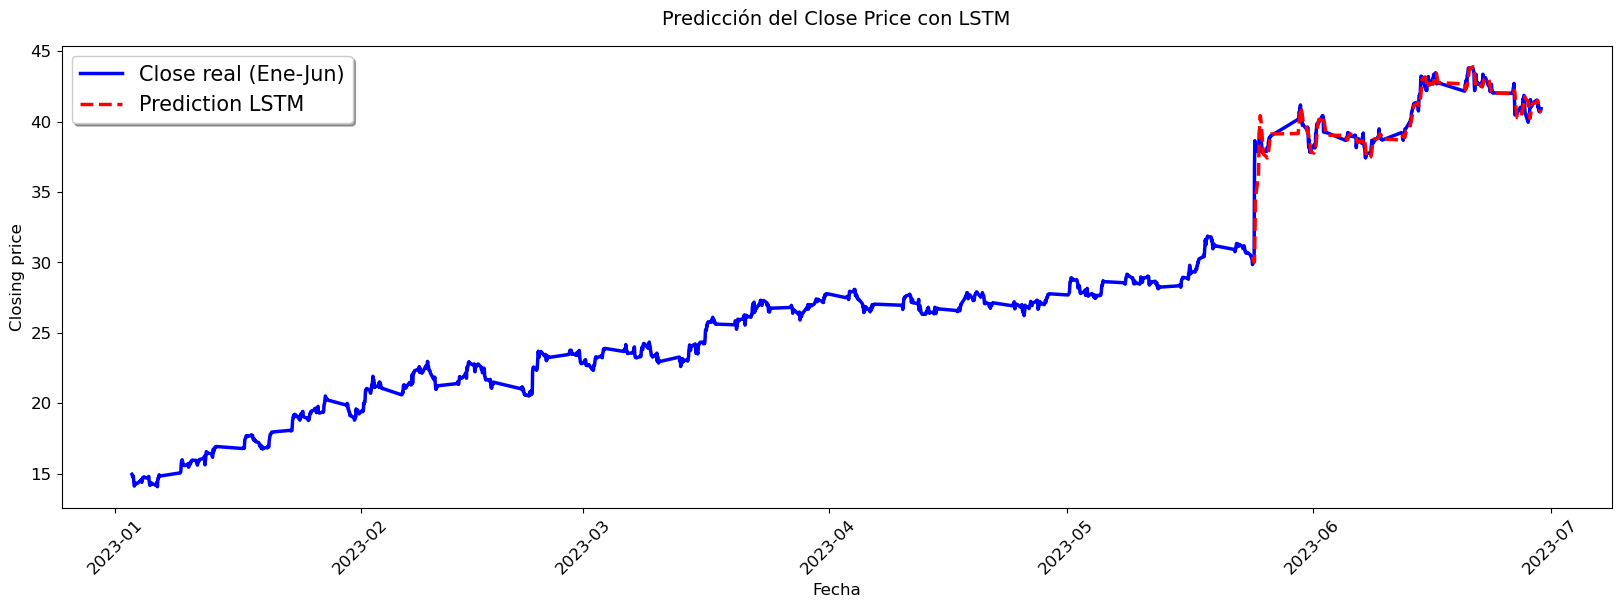

In [64]:
# Configuración de la gráfica
plt.style.use('default')
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(20, 6))  
plt.gcf().patch.set_facecolor('white')
plt.plot(fechas, data, label='Close real (Ene-Jun)', linewidth=2.5, color='blue')
plt.plot(fechas_pred, predictions_inverse_LSTM, label='Prediction LSTM', color='red', linestyle='--', linewidth=2.5)
plt.title('Predicción del Close Price con LSTM', fontsize=14, pad=15)
plt.ylabel('Closing price', fontsize=12)
plt.xlabel('Fecha', fontsize=12)
plt.legend(prop={'size': 15}, frameon=True, shadow=True, loc='upper left')
plt.gca().get_legend().get_frame().set_facecolor('white')
plt.grid(False)
plt.xticks(rotation=45)

plt.show()